<a href="https://colab.research.google.com/github/voideans/Fake-Note-Detection/blob/main/Fake_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loading the dataset
url = 'https://raw.githubusercontent.com/voideans/Fake-Note-Detection/main/Banknote_authentication_dataset.csv'
data = pd.read_csv(url)
print(data)

           V1        V2
0     3.62160   8.66610
1     4.54590   8.16740
2     3.86600  -2.63830
3     3.45660   9.52280
4     0.32924  -4.45520
...       ...       ...
1367  0.40614   1.34920
1368 -1.38870  -4.87730
1369 -3.75030 -13.45860
1370 -3.56370  -8.38270
1371 -2.54190  -0.65804

[1372 rows x 2 columns]


In [9]:
# calculating mean and standard deviation of V1 and V2
total_mean = [data[i].mean() for i in ['V1','V2']]
total_std = [data[i].std() for i in ['V1','V2']]
print(total_mean,total_std)

[0.43373525728862977, 1.9223531209912554] [2.8427625862451675, 5.8690467435803795]


In [15]:
# Normalizing the data
normed = [((data['V1'] - data['V1'].min()) / (data['V1'].max() - data['V1'].min())) for i in ['V1','V2']]
# print(normed)

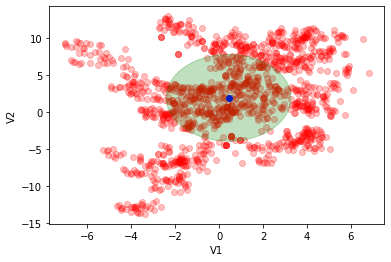

In [51]:
# Visualizing the data

import matplotlib.patches as patches

ellipse = patches.Ellipse( (total_mean[0],total_mean[1]), total_std[0]*2, total_std[1]*2,alpha=0.25,color='green')

fig, graph = plt.subplots()
graph.scatter(data['V1'],data['V2'],alpha=0.25,color='red')
plt.xlabel('V1')
plt.ylabel('V2')
graph.scatter(total_mean[0],total_mean[1],color='blue')
graph.add_patch(ellipse)
plt.show()

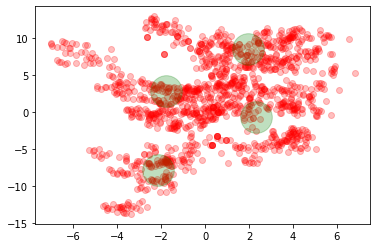

In [57]:
# Applying KMeans
from sklearn.cluster import KMeans

km_res = KMeans(n_clusters=4).fit(data)
clusters=km_res.cluster_centers_

plt.scatter(data['V1'],data['V2'],alpha=0.25,color='red')
plt.scatter(clusters[:,0],clusters[:,1],color='green',s=1000,alpha=0.25)